In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import warnings
path= 'E:\myproject\steam'
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        filepath= os.path.join(dirname, filename)
        print(filepath)

E:\myproject\steam\achievements.csv
E:\myproject\steam\friends.csv
E:\myproject\steam\games.csv
E:\myproject\steam\history.csv
E:\myproject\steam\players.csv
E:\myproject\steam\prices.csv
E:\myproject\steam\private_steamids.csv
E:\myproject\steam\purchased_games.csv
E:\myproject\steam\reviews.csv


<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_2496\1105647532.py:3: SyntaxWarning: invalid escape sequence '\m'
  path= 'E:\myproject\steam'


In [3]:
folder_path = r"E:\myproject\steam"

# List of filenames
filenames = [
    "achievements.csv",
    "friends.csv",
    "games.csv",
    "history.csv",
    "players.csv",
    "prices.csv",
    "private_steamids.csv",
    "purchased_games.csv",
    "reviews.csv"
]

# Dictionary to store DataFrames
dataframes = {}
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    var_name = os.path.splitext(filename)[0]
    globals()[var_name] = pd.read_csv(file_path)

In [4]:
players.head(5)

,playerid,country,created
0,76561198287452552,Brazil,2016-03-02 06:14:20
1,76561198040436563,Israel,2011-04-10 17:10:06
2,76561198049686270,NaN,2011-09-28 21:43:59
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47
4,76561198119605821,NaN,2013-12-26 00:25:50


In [5]:
purchased_games.head(5)

,playerid,library
0,76561198060698936,"[60, 1670, 3830, 1600, 2900, 2910, 2920, 4800,..."
1,76561198287452552,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698..."
2,76561198040436563,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130..."
3,76561198042412488,"[300, 240, 220, 320, 360, 4300, 4800, 4000, 61..."
4,76561198119605821,"[47870, 108600, 550, 271590, 331470, 381210, 2..."


In [6]:
friends.head(5)

,playerid,friends
0,76561198060422271,"['76561198018120276', '76561198034545417', '76..."
1,76561198113439786,"['76561198047435192', '76561198059136488', '76..."
2,76561198149851326,"['76561197991555589', '76561198003513187', '76..."
3,76561198296997371,NaN
4,76561198895573082,"['76561197960300358', '76561197961330830', '76..."


In [7]:
players = players.merge(purchased_games, on='playerid', how='left')
players = players.merge(friends, on='playerid', how='left')
players.head(5)

,playerid,country,created,library,friends
0,76561198287452552,Brazil,2016-03-02 06:14:20,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698...",NaN
1,76561198040436563,Israel,2011-04-10 17:10:06,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130...","['76561197961017729', '76561197963826101', '76..."
2,76561198049686270,NaN,2011-09-28 21:43:59,NaN,"['76561197966947992', '76561197967022261', '76..."
3,76561198155814250,Kazakhstan,2014-09-24 19:52:47,NaN,"['76561197967179492', '76561198012726211', '76..."
4,76561198119605821,NaN,2013-12-26 00:25:50,"[47870, 108600, 550, 271590, 331470, 381210, 2...","['76561197993755024', '76561198035895485', '76..."


In [8]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424683 entries, 0 to 424682
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   playerid  424683 non-null  int64 
 1   country   246815 non-null  object
 2   created   377014 non-null  object
 3   library   46941 non-null   object
 4   friends   339461 non-null  object
dtypes: int64(1), object(4)
memory usage: 16.2+ MB


In [9]:
players.shape

(424683, 5)

In [10]:
players.describe()

,playerid
count,4.246830e+05
mean,7.656120e+16
std,3.995359e+08
min,7.656120e+16
25%,7.656120e+16
50%,7.656120e+16
75%,7.656120e+16
max,7.656120e+16


In [11]:
players.isnull().sum()

playerid         0
country     177868
created      47669
library     377742
friends      85222
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Russian Federation'),
  Text(5, 0, 'China'),
  Text(6, 0, 'Poland'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Türkiye'),
  Text(9, 0, 'Canada')])

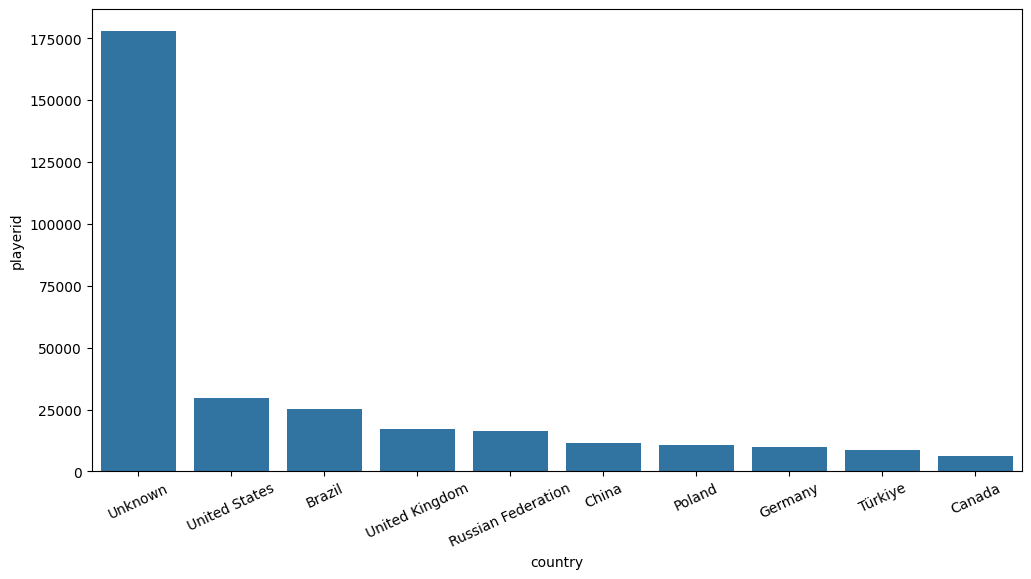

In [12]:
players["country"]= players["country"].fillna("Unknown")
country_counts=  players.groupby("country").agg({'playerid':'count'}).reset_index()
country_counts= country_counts.sort_values(by="playerid", ascending= False)
plt.figure(figsize =(12,6))
sns.barplot(x= country_counts["country"][:10], y= country_counts["playerid"][:10])
plt.xticks(rotation= 25)

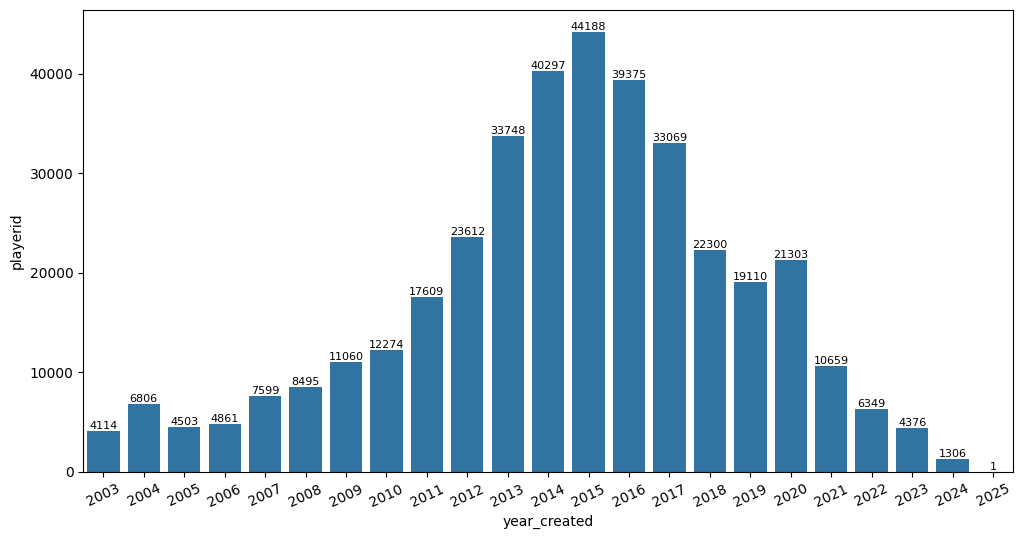

In [13]:
players["year_created"] = players["created"].str[:4]
gby = players.groupby("year_created").agg({"playerid":'count'}).reset_index()

plt.figure(figsize =(12,6))
ax =sns.barplot(x= gby["year_created"], y= gby["playerid"])
plt.xticks(rotation= 25)
for bar in ax.patches:
    # Get bar height
    height = bar.get_height()
    # Place the text in the center top of each bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # X-coordinate
        height,                              # Y-coordinate (at the top of the bar)
        f'{int(height)}',                         # Text label (formatted as needed)
        ha='center',                         # Horizontal alignment
        va='bottom' ,    
        fontsize = 8                    # Vertical alignment
    )


In [14]:
from collections import Counter
import ast

In [15]:
def safe_parse_owned(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    else:
        return [] 
    

playerss= players[players['library'].notna()].copy()
playerss["library"] = playerss["library"].apply(safe_parse_owned)
    


In [16]:
all_games = [game for sublist in playerss['library'] for game in sublist]
game_counts = Counter(all_games)

if game_counts:
    most_common_game, count = game_counts.most_common(1)[0]
    print(f"Most common game ID: {most_common_game}, Count: {count}")
else:
    print("No valid game data found.")

Most common game ID: 730, Count: 43967


In [17]:
game_count = pd.DataFrame(game_counts.items(), columns=['gameid', 'count'])
game_count = game_count.sort_values(by="count", ascending= False)
game_count

,gameid,count
149,730,43967
308,578080,28356
24,550,24727
297,218620,23785
651,304930,21620
...,...,...
32706,663020,1
32718,656170,1
32744,647790,1
37386,560920,1


In [18]:
game_count = game_count.merge(games, on='gameid', how='left')
game_count 

,gameid,count,title,developers,publishers,genres,supported_languages,release_date
0,730,43967,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21
1,578080,28356,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13
4,304930,21620,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07
...,...,...,...,...,...,...,...,...
40983,663020,1,Cutlass,['Demigon'],['Demigon'],"['Action', 'Adventure', 'Indie', 'Simulation']",['English'],2017-07-20
40984,656170,1,RadianVR,['Grand Unified LLC'],['Grand Unified LLC'],"['Casual', 'Indie']",['English'],2018-03-08
40985,647790,1,Holomeld,['mindmeld.io Inc.'],['mindmeld.io Inc.'],['Indie'],['English'],2017-09-20
40986,560920,1,Cyberlink PowerDVD 17 Ultra,['CyberLink'],['Koch Media'],['Video Production'],"['English', 'French', 'Italian', 'German', 'Sp...",2017-04-18


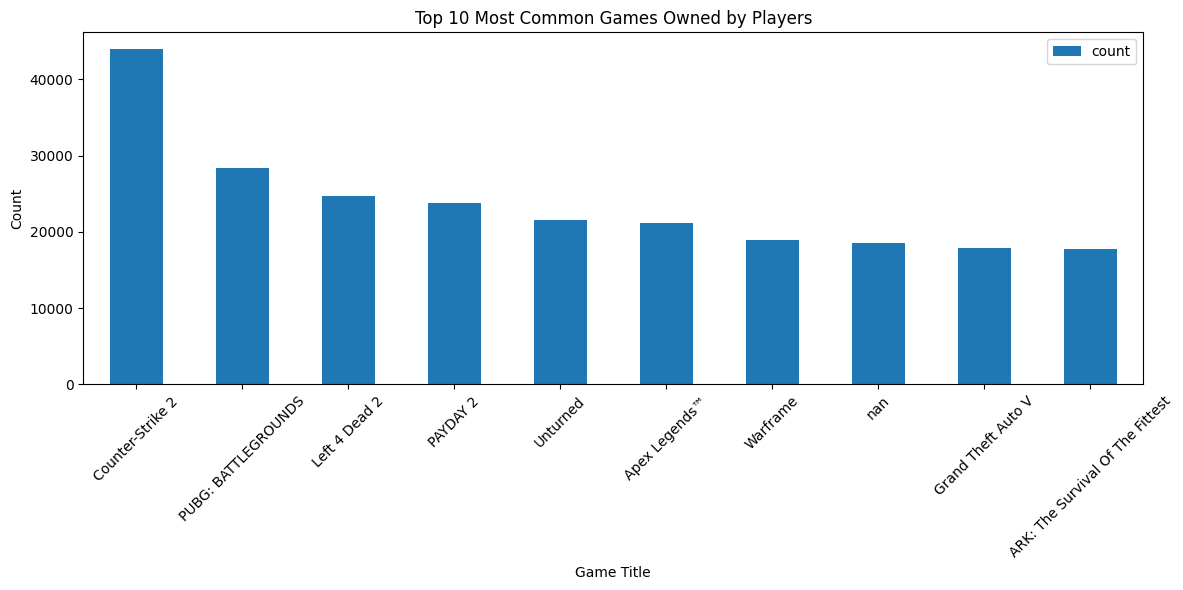

In [40]:
game_count.head(10).plot(kind='bar', x='title', y='count', figsize=(12, 6))
plt.title('Top 10 Most Common Games Owned by Players')
plt.xlabel('Game Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()